In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pathlib
from math import floor
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

### Load data

In [2]:
target = 'System_Load'
data = pd.read_csv(str(pathlib.Path("../data/interim/regularized.csv")), 
                   parse_dates=True, infer_datetime_format=True, index_col=0)

### Inspect trend of data

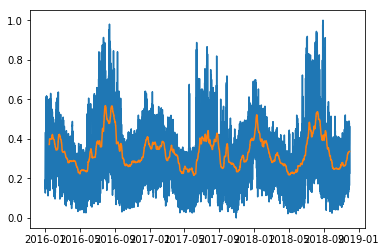

In [4]:
load_moving_avg_biweek = data[target].rolling(window=24*14).median()
plt.plot(data.loc[:, target])
plt.plot(load_moving_avg_biweek)
plt.show()

In [5]:
# No evidence of trend (data does not tend upward or downward)

### Inspect seasonality of data

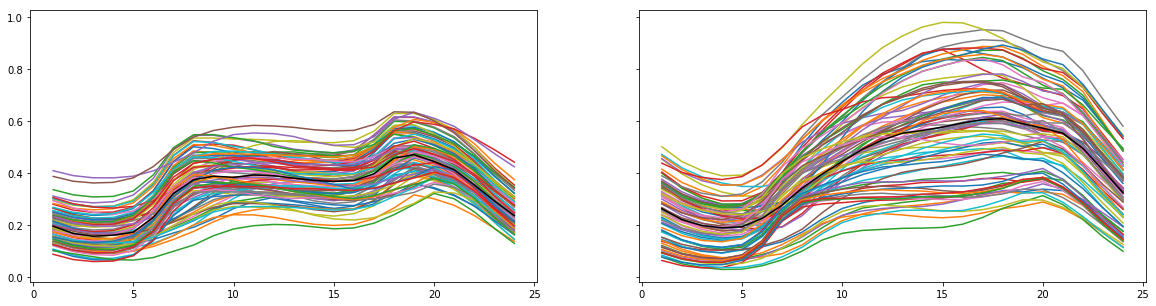

In [6]:
# Daily trend? Plot days by the hourly measurement for 12 weeks
# First plot shows wintertime, second plot shows summertime
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,5), sharey=True)
weeks = 12
step = 24 #hours
offset = step * 7 * 28
periods_winter = []
periods_summer = []
end = floor((step * 7 * weeks) / step)
for i in range(0,end):
    start = i * step
    stop = (i+1) * step
    periods_winter.append(data.iloc[start:stop].loc[:, target])
    periods_summer.append(data.iloc[offset+start:offset+stop].loc[:, target])
    ax1.plot(np.arange(1,step+1), data.iloc[start:stop].loc[:, target])
    ax2.plot(np.arange(1,step+1), data.iloc[offset+start:offset+stop].loc[:, target])
median_winter = np.median(periods_winter, axis=0)
ax1.plot(np.arange(1,step+1), median_winter, c='black')
median_summer = np.median(periods_summer, axis=0)
ax2.plot(np.arange(1,step+1), median_summer, c='black')
plt.show()

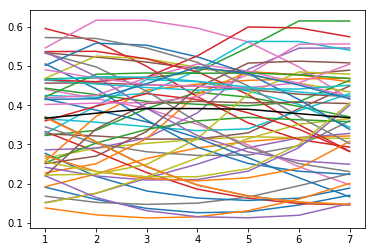

In [7]:
# Weekly trend? Plot weeks by the daily mean for a year
weeks = 52
step = 7 #days
periods = []
data_daily = data.resample('1D').mean()
end = floor((step * weeks) / step)
for i in range(0,end):
    start = i * step
    stop = (i+1) * step
    periods.append(data.iloc[start:stop].loc[:, target])
    plt.plot(np.arange(1,step+1), data.iloc[start:stop].loc[:, target])
median = np.median(periods, axis=0)
plt.plot(np.arange(1,step+1), median, c='black')
plt.show()

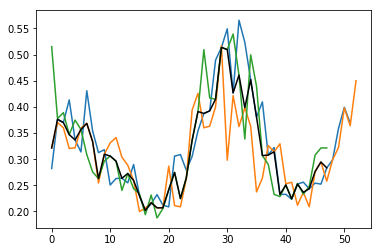

In [8]:
# Yearly trend? Plot years by weekly mean
periods = []
data_weekly = data.resample('1W').mean()
for year in ['2016', '2017', '2018']:
    plt.plot(np.arange(0,data_weekly[year].shape[0]), data_weekly.loc[year, target])
    periods.append(data_weekly.loc[year, target].iloc[:48])
median = np.median(periods, axis=0)
plt.plot(median, c='black')
plt.show()

### Inspect correlation of sequential data

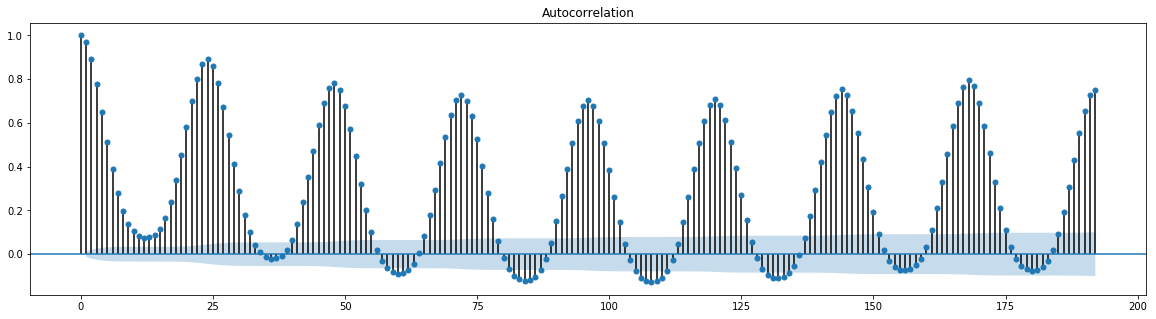

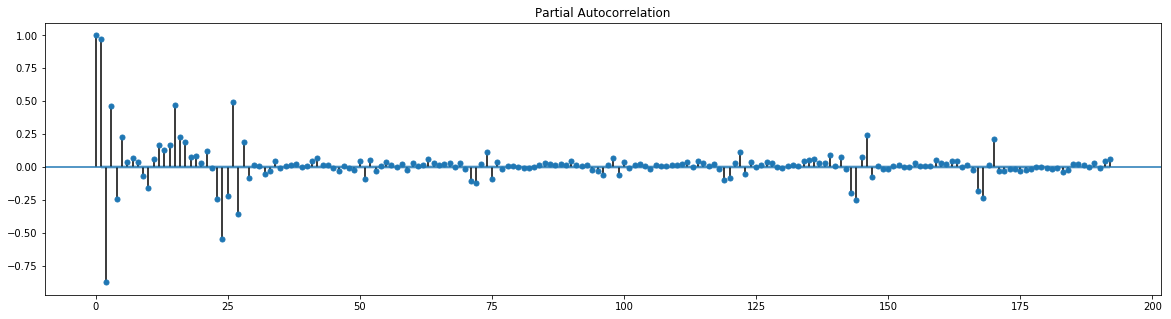

In [14]:
# Short range: one week + day
fix, ax = plt.subplots(figsize=(20,5))
plot_acf(data[target], lags=24*8, unbiased=True, ax=ax)
plt.show()
fix, ax = plt.subplots(figsize=(20,5))
plot_pacf(data[target], lags=24*8, ax=ax)
plt.show()

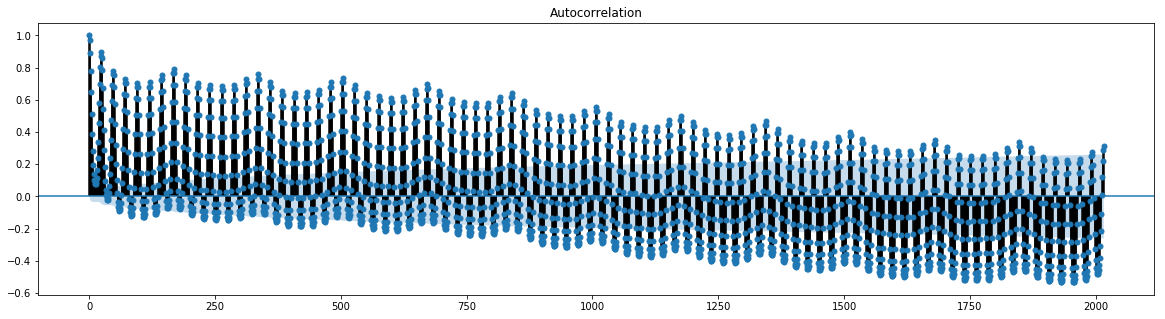

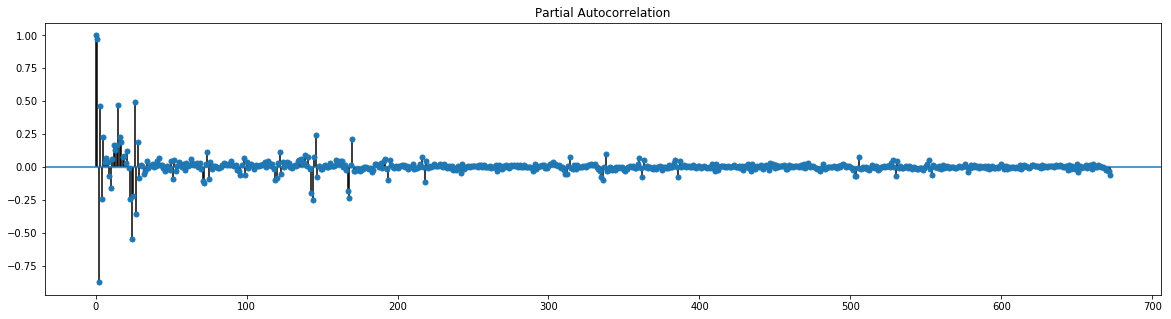

In [9]:
# Short range: three/one month(s)
fix, ax = plt.subplots(figsize=(20,5))
plot_acf(data[target], lags=24*7*4*3, unbiased=True, ax=ax)
plt.show()
fix, ax = plt.subplots(figsize=(20,5))
plot_pacf(data[target], lags=24*7*4, ax=ax)
plt.show()